In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.stats.multitest

In [2]:
normalized_bulk_seq = pd.read_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/PL01_raw_matrix_NORMALIZED.csv', index_col= 0)
normalized_bulk_seq = normalized_bulk_seq.drop(columns = ['CML333_1091/1092_1','CML333_1091/1092_2'])
bulk_seq_summary = pd.read_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/WN20NAM_streamlined_with_bins.csv',index_col= 0)

In [3]:
NAM_line_list = bulk_seq_summary['NAM_line'].to_list()
NAM_list_of_avg_meristem_sizes = bulk_seq_summary['Avg_IM_Width']
kernel_row_number_list = bulk_seq_summary['KRN']
kernel_row_number_list.index = NAM_line_list
NAM_list_of_avg_meristem_sizes.index = NAM_line_list

In [4]:
normalized_mean_values_of_each_landrace = pd.DataFrame(index= normalized_bulk_seq.index)
for landrace in NAM_line_list:
    normalized_mean_values_of_each_landrace[landrace] = normalized_bulk_seq.filter(like = landrace,axis = 1).mean(axis = 1).values

In [5]:
expressed_genes_each_landrace = normalized_mean_values_of_each_landrace.loc[normalized_mean_values_of_each_landrace.mean(axis =1) >1]
expressed_genes_each_landrace

,B104,B73,CML277,CML322,Hp301,Il14H,M162W,Mo17,Mo18W,NC350,NC358,Oh43,Oh7B,P39,Tzi8
GRMZM2G059865,36.911356,308.003602,263.095125,229.919048,214.632154,436.185337,306.788786,44.403649,125.104655,212.158191,239.593980,200.039115,145.581912,230.295205,330.274863
GRMZM2G093399,0.000000,0.315388,7.531771,3.863227,9.791990,0.000000,6.276539,0.000000,0.000000,1.715822,6.836461,0.000000,9.920080,0.000000,4.997008
GRMZM2G023863,0.286432,0.000000,101.161604,49.566822,4.489632,27.889478,49.157641,55.118297,0.311111,82.303018,0.803520,50.004665,23.161030,1.359563,115.998585
GRMZM2G408834,0.595285,0.000000,10.278362,14.097724,2.078399,0.000000,0.791917,1.695013,10.739423,1.189060,0.747485,0.000000,2.685611,10.978591,1.973973
GRMZM2G330436,18.110519,19.289630,17.779329,31.389800,19.918136,26.130485,23.405644,19.343107,19.293406,16.490789,17.771892,20.005059,17.008167,14.065836,18.791750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.736187,4.704859,6.731045,2.526526,3.971024,3.404988,3.930186,8.422975,9.694541,4.881520,2.955677,7.811863,3.167289,2.744648,4.816773
RPL14,10.381669,14.251685,12.721007,7.678897,10.164861,8.467047,6.775391,8.485647,12.950126,15.687823,7.738189,12.581670,8.044911,10.559431,7.894281
GRMZM5G853305,2.281605,1.511080,3.920831,1.289144,1.739880,1.961374,1.173176,1.767035,2.212642,2.638937,2.096123,0.884800,0.297151,0.914883,3.396486
RPS3.1,10.085252,9.612358,9.775125,8.492547,7.269372,9.811672,9.385410,13.390355,10.024684,8.308034,8.828423,11.603798,5.942350,10.038188,7.678803


In [6]:
expressed_genes_ranks = expressed_genes_each_landrace.mean(axis =1).rank()

<AxesSubplot:ylabel='Count'>

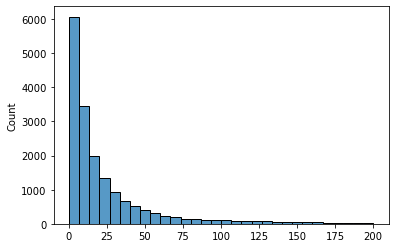

In [7]:
sns.histplot(expressed_genes_each_landrace.mean(axis =1), binrange = (0,200),bins = 30)

In [8]:
expressed_genes_each_landrace.max(axis =0)

B104      21860.472634
B73       18747.532407
CML277    19345.781210
CML322    19117.658018
Hp301     10112.969921
Il14H     14598.071255
M162W     20345.606274
Mo17      27399.587741
Mo18W     27860.804994
NC350      9633.403300
NC358     17384.777266
Oh43      21336.425519
Oh7B      17684.558140
P39       11051.315367
Tzi8      29250.234980
dtype: float64

In [9]:
top_75_percentile_genes = expressed_genes_each_landrace.loc[expressed_genes_ranks> 16401]
#top_75_percentile_genes = expressed_genes_each_landrace.loc[expressed_genes_ranks< 17000]
top_75_percentile_genes

,B104,B73,CML277,CML322,Hp301,Il14H,M162W,Mo17,Mo18W,NC350,NC358,Oh43,Oh7B,P39,Tzi8
GRMZM2G059865,36.911356,308.003602,263.095125,229.919048,214.632154,436.185337,306.788786,44.403649,125.104655,212.158191,239.593980,200.039115,145.581912,230.295205,330.274863
GRMZM2G161560,488.130871,471.859646,519.398872,442.374585,478.280822,484.288934,555.775892,667.099494,394.289274,590.995726,500.167203,562.542481,362.069757,881.104633,399.157609
GRMZM2G060296,111.455675,95.462150,132.628415,91.490661,122.827895,124.342006,126.149965,60.933457,83.120310,92.989173,88.151173,70.659163,96.399417,87.384049,84.385413
TUBB1,575.158702,528.041069,594.660424,449.248222,600.873942,480.375768,463.038009,464.165687,433.943082,430.025723,505.161702,560.204465,396.230113,435.341815,342.329516
GRMZM2G041881,237.129886,164.689439,87.977828,209.513555,167.220783,170.892221,192.345768,176.002598,184.889562,210.125128,202.300733,184.762379,190.057152,219.990984,182.132627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G074787,97.756989,84.074261,189.733009,152.994781,82.218538,121.427846,136.089356,100.144308,117.079697,110.569392,92.177270,135.517289,108.744171,120.585856,101.790322
GRMZM2G074718,97.288426,145.098660,140.160185,148.578039,113.101567,60.016468,129.756772,76.839671,125.553888,161.982489,116.477384,164.018320,182.615577,52.567468,163.924070
GRMZM2G106647,70.883328,48.442747,79.624037,88.855276,71.443385,52.563190,327.883893,68.749189,61.161153,453.264780,82.848879,68.659434,67.370517,69.403473,55.038427
GRMZM2G177151,112.178879,90.767381,103.521087,114.078216,77.583169,72.172312,61.827394,91.391051,107.771061,94.981199,115.953792,58.487300,89.021808,111.641198,109.909411


In [10]:
top_75_percentile_genes = top_75_percentile_genes.loc[top_75_percentile_genes.min(axis = 1)>20]
top_75_percentile_genes = top_75_percentile_genes.loc[top_75_percentile_genes.max(axis = 1)<1000]

In [11]:
top_75_percentile_genes.max(axis = 1)['PIP2.6']

359.9642887958905

In [12]:
18224 *.9

16401.600000000002

In [13]:
variance_of_top_75 = top_75_percentile_genes.var(axis =1)
variance_of_top_75

GRMZM2G059865    11140.806531
GRMZM2G161560    16305.780388
GRMZM2G060296      449.796124
TUBB1             5715.989716
GRMZM2G041881     1141.531298
                     ...     
GRMZM2G074787      802.116848
GRMZM2G074718     1550.550893
GRMZM2G106647    13555.760197
GRMZM2G177151      367.519286
GRMZM2G104613      140.800860
Length: 1554, dtype: float64

(0.0, 500.0)

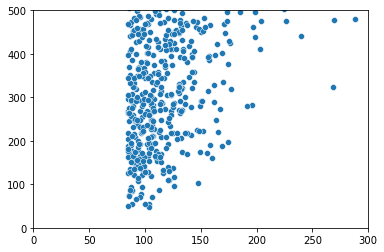

In [14]:
sns.scatterplot(y = variance_of_top_75, x = normalized_mean_values_of_each_landrace.mean(axis =1))
plt.xlim((0,300))
plt.ylim(0,500)

In [15]:
gene_quantile_values = pd.qcut(x =expressed_genes_ranks, q = 20, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen'])

In [16]:
quantile_list = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen']

In [17]:
list_of_highly_variable_genes = []
for quant in quantile_list:
    panda_of_quant =  top_75_percentile_genes.loc[gene_quantile_values == quant]
    ranks_of_quant = panda_of_quant.var(axis =1).rank()
    top_25_ranking = len(ranks_of_quant)*.975
    top_genes_in_quant = ranks_of_quant[ranks_of_quant>top_25_ranking].index
    list_of_highly_variable_genes.extend(top_genes_in_quant)
    

In [18]:
print(len(list_of_highly_variable_genes))

40


In [19]:
highly_variable_and_expressed_genes = top_75_percentile_genes.loc[top_75_percentile_genes.index.isin(list_of_highly_variable_genes)]
highly_variable_and_expressed_genes

,B104,B73,CML277,CML322,Hp301,Il14H,M162W,Mo17,Mo18W,NC350,NC358,Oh43,Oh7B,P39,Tzi8
GRMZM2G137839,775.502014,755.017333,176.311648,233.120837,392.035621,547.956919,644.374135,440.141054,594.145799,762.805771,473.708044,872.651990,267.423679,640.458038,474.692211
GRMZM2G153450,258.176490,200.638241,211.222407,252.778898,222.762620,42.223725,39.830111,236.525085,44.776764,29.946288,44.299336,86.315364,234.300706,29.123117,167.671557
GRMZM2G131434,185.634879,77.421696,298.897575,147.901708,111.462390,119.572963,182.842766,122.164901,254.504641,52.768473,117.648154,226.916739,102.304957,165.936347,167.033601
GRMZM2G053764,150.758370,303.207899,135.949410,71.016928,409.814931,250.720781,94.031402,151.160040,109.496405,77.828111,91.083714,157.269797,130.468822,63.786572,186.992316
GRMZM2G044762,417.573701,318.899772,667.003149,597.307559,565.145704,356.359928,916.298348,498.044229,735.124736,524.176140,633.005120,703.917397,438.207915,366.612712,654.741920
GRMZM2G446999,89.636556,74.679138,45.822601,73.152484,69.262565,54.302116,133.155041,310.916245,102.018924,55.277001,85.100609,131.005259,65.964295,53.267359,102.911853
GRMZM2G177432,259.988863,203.466250,74.297065,171.492528,52.426619,65.155151,62.442922,54.142823,178.657154,37.857968,161.758638,53.229719,42.751506,38.793187,106.854970
GRMZM2G015295,701.063987,836.499707,717.515061,808.523531,134.596314,189.010566,994.769747,734.641884,636.142308,819.953856,777.135283,877.098758,593.899415,296.090189,864.041309
GRMZM2G119219,118.904058,420.225768,116.846788,109.975100,159.185967,126.934114,125.416845,211.181382,56.465983,181.628717,120.035048,112.163265,219.619373,103.407255,250.313308
GRMZM2G118490,184.234458,134.395068,23.793428,73.671848,183.402037,257.668440,261.772618,297.957885,89.961535,55.011056,45.466785,331.224333,217.835320,121.096276,149.901114


(0.0, 500.0)

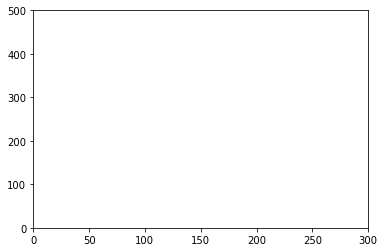

In [20]:
sns.scatterplot(x = highly_variable_and_expressed_genes.mean(axis =1), y = highly_variable_and_expressed_genes.var(axis = 1))
plt.xlim((0,300))
plt.ylim(0,500)

In [21]:
corr_and_p_value_list = []
for land_race_gene in highly_variable_and_expressed_genes.iterrows():
    current_correlation, current_pvalue = stats.pearsonr(land_race_gene[1],NAM_list_of_avg_meristem_sizes)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list.append(current_values_to_append)

In [22]:
stats_and_pearson_calculated = pd.DataFrame(index = highly_variable_and_expressed_genes.index, data = corr_and_p_value_list, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated = stats_and_pearson_calculated.dropna()

In [23]:
stats_and_pearson_calculated

,Pearson Correlation with Meristem Width,P Value
GRMZM2G137839,0.187059,0.504416
GRMZM2G153450,-0.060659,0.829964
GRMZM2G131434,-0.312377,0.256991
GRMZM2G053764,0.078116,0.781996
GRMZM2G044762,-0.389569,0.151189
GRMZM2G446999,-0.444794,0.096658
GRMZM2G177432,0.152216,0.588122
GRMZM2G015295,0.044284,0.875476
GRMZM2G119219,0.455474,0.087983
GRMZM2G118490,-0.398330,0.141409


<AxesSubplot:xlabel='P Value', ylabel='Count'>

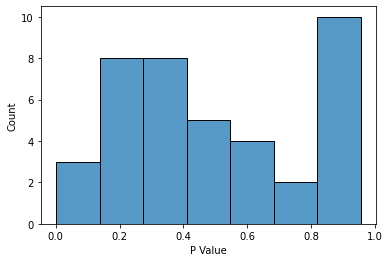

In [24]:
sns.histplot(data = stats_and_pearson_calculated, x = 'P Value')

In [25]:
reject, corrected, value_3, value_4 = statsmodels.stats.multitest.multipletests(stats_and_pearson_calculated['P Value'],method = 'fdr_bh')
stats_and_pearson_calculated['Corrected P Value'] = corrected

In [26]:
stats_and_pearson_calculated.sort_values(by = 'Pearson Correlation with Meristem Width', ascending= True)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G446999,-0.444794,0.096658,0.811242
GRMZM2G118490,-0.398330,0.141409,0.811242
GRMZM2G044762,-0.389569,0.151189,0.811242
GRMZM2G149556,-0.368221,0.176881,0.811242
GRMZM2G131434,-0.312377,0.256991,0.811242
GRMZM2G101024,-0.305680,0.267873,0.811242
GRMZM2G140739,-0.293693,0.288033,0.811242
GRMZM2G151826,-0.239467,0.390009,0.811242
GRMZM2G105364,-0.235671,0.397793,0.811242
GRMZM2G171430,-0.233850,0.401555,0.811242


In [27]:
pd.read

AttributeError: module 'pandas' has no attribute 'read'